In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

print("All libraries are working fine!")


All libraries are working fine!


In [2]:
# Initial viewing of the dataset
path = r'C:\Users\Caleb\OneDrive\Desktop\ML Engineering\churn\customer-churn-analysis\data\Telco-Customer-Churn.csv'
#Load the dataset
data = pd.read_csv(path)
# View the first few rows of the dataset
print(data.head())
# View the data types and summary of each column
print(data.info())
# View basic statistics for numerical columns
print(data.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:


# Change TotalCharges into Float data type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].astype(str).str.strip())\

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
0


In [4]:
data.TotalCharges.isna().sum()

11

Null values in TotalCharges after filling: 0


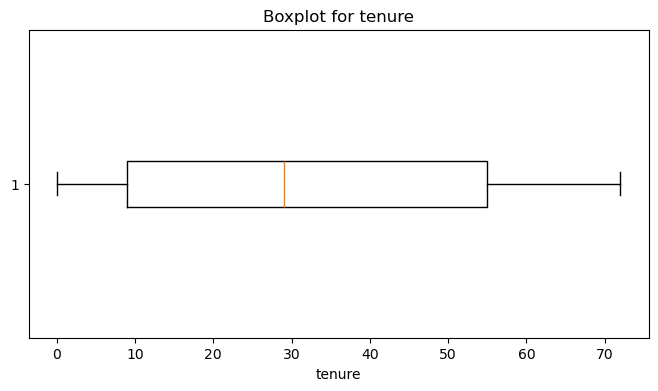

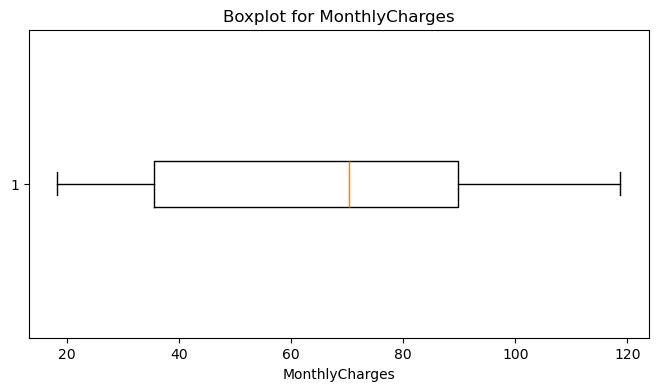

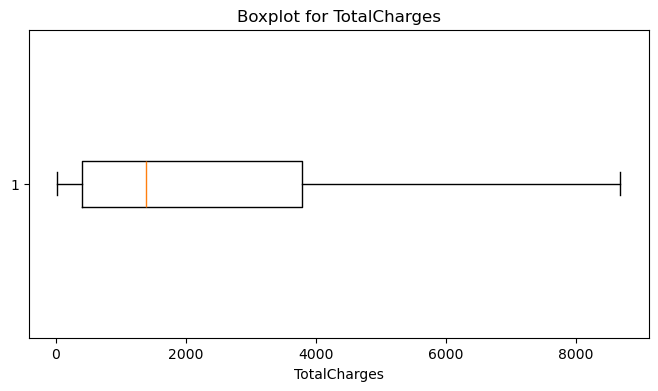

Data Sets dont seem to be heavily skewed, therefore continue with analysis


In [9]:
#Fill null values with median
# Fill null values with the median of the TotalCharges column
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Verify if null values are filled
print("Null values in TotalCharges after filling:", data['TotalCharges'].isnull().sum())


# Checking for outliers
# Use numerical columns
numerical_columns = ['tenure', 'MonthlyCharges','TotalCharges']

# Plot boxplots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[col], vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()
print("Data Sets dont seem to be heavily skewed, therefore continue with analysis")

Churn
No     5174
Yes    1869
Name: count, dtype: int64


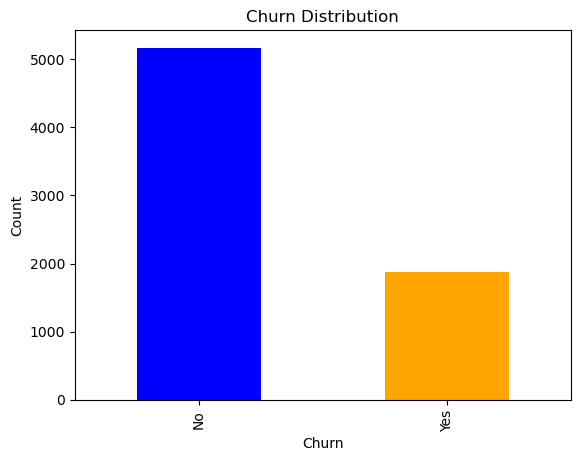

In [11]:
# Initial EDA Procedure (Exploratory Data Analysis)
# Count of churned vs non-churned customers
churn_counts = data['Churn'].value_counts()
print(churn_counts)

# Visualize churn distribution using a bar chart
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


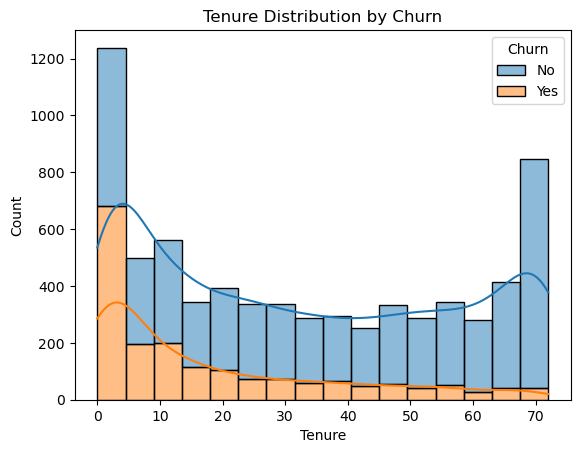

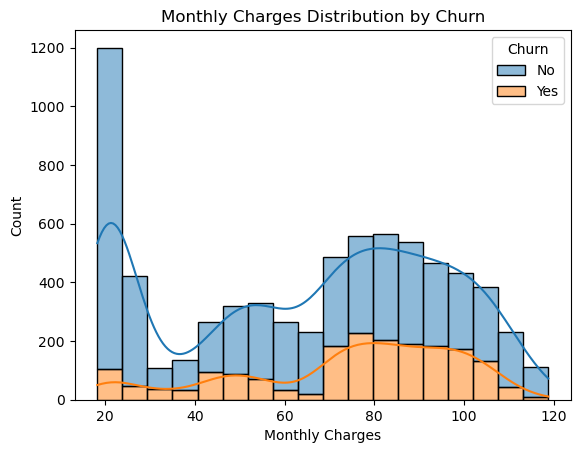

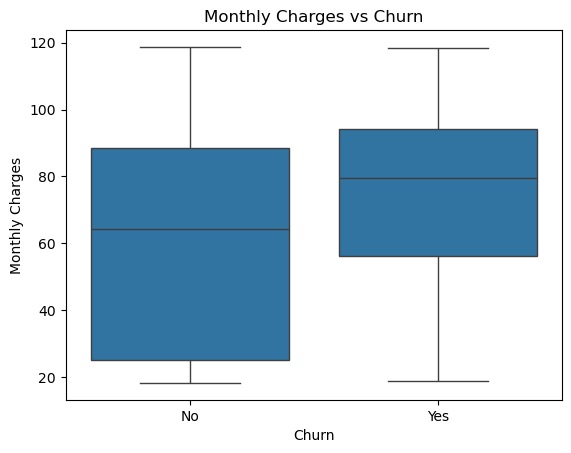

In [13]:
# Further Viewing of Numerical columns with Churn

# A histogram with KDE (Kernel Density Estimate) is used to visualize the distribution of 'tenure'
sns.histplot(data=data, x='tenure',hue='Churn',multiple='stack',kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

# A histogram with KDE is used to visualize the distribution of 'MonthlyCharges'
sns.histplot(data=data,x='MonthlyCharges',hue='Churn',multiple='stack',kde=True)
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# A boxplot is used here to compare the distribution of 'MonthlyCharges' between customers who churned and those who didn't
sns.boxplot(x='Churn',y='MonthlyCharges',data=data)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [14]:
# Feature Engineering
# Apply one-hot encoding to categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

# Use one-hot encoding for multi-class categorical features
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Preview the updated dataset

print(data_encoded.head())





   customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  \
0  7590-VHVEG              0       1           29.85         29.85    No   
1  5575-GNVDE              0      34           56.95       1889.50    No   
2  3668-QPYBK              0       2           53.85        108.15   Yes   
3  7795-CFOCW              0      45           42.30       1840.75    No   
4  9237-HQITU              0       2           70.70        151.65   Yes   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False         True           False             False  ...   
1         True        False           False              True  ...   
2         True        False           False              True  ...   
3         True        False           False             False  ...   
4        False        False           False              True  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False            False   
1           

In [17]:
# Drop unnecessary columns to prepare for Pre-processing
data_encoded = data_encoded.drop(['customerID'], axis=1, errors='ignore')


In [19]:
data_encoded.TotalCharges.fillna(0)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
#For models like Logistic Regression, scaling numerical features is essentiaal  therefo i'll use StandardScaler to standardize the features.
# Data preparation and Pre-processing
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Preview scaled data


data_encoded = data_encoded.fillna(0)



In [23]:
data_encoded.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [25]:
from sklearn.model_selection import train_test_split
# Dataset is split into training and testing sets to train the model on one portion of the data and evaluate its performance on unseen data,.. 
# ensuring generalization.

# Define features and target
X = data_encoded.drop('Churn', axis=1)  # Features
y = data_encoded['Churn']              # Target

# Split the dataset into training and test sets (20% of training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of each set
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)




Training set size: (5634, 30)
Testing set size: (1409, 30)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)